# Exploratory Data Analysis (EDA)

## Objective
To analyze historical Bitcoin price and volume data, identify trends,
volatility patterns, and seasonality, and extract insights before
time series forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv(
    "../data/processed/btc_usd_cleaned.csv",
    index_col=0,
    parse_dates=True
)

df.head()

,Close,Volume
Price,,
2019-01-01,3843.520020,4324200990
2019-01-02,3943.409424,5244856836
2019-01-03,3836.741211,4530215219
2019-01-04,3857.717529,4847965467
2019-01-05,3845.194580,5137609824


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2567 entries, 2019-01-01 to 2026-01-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2567 non-null   float64
 1   Volume  2567 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 60.2 KB


In [4]:
df.describe()


,Close,Volume
count,2567.000000,2.567000e+03
mean,41707.022118,3.367001e+10
std,32352.014658,2.134550e+10
min,3399.471680,4.324201e+09
25%,11864.317383,1.899653e+10
50%,32569.849609,2.900948e+10
75%,61259.888672,4.262007e+10
max,124752.531250,3.509679e+11


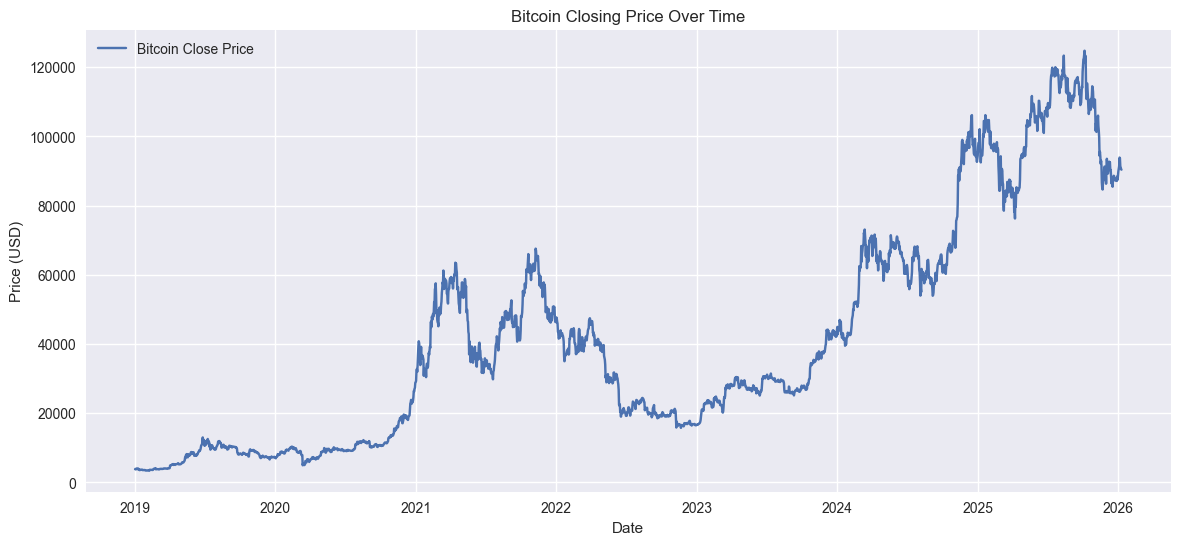

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Bitcoin Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


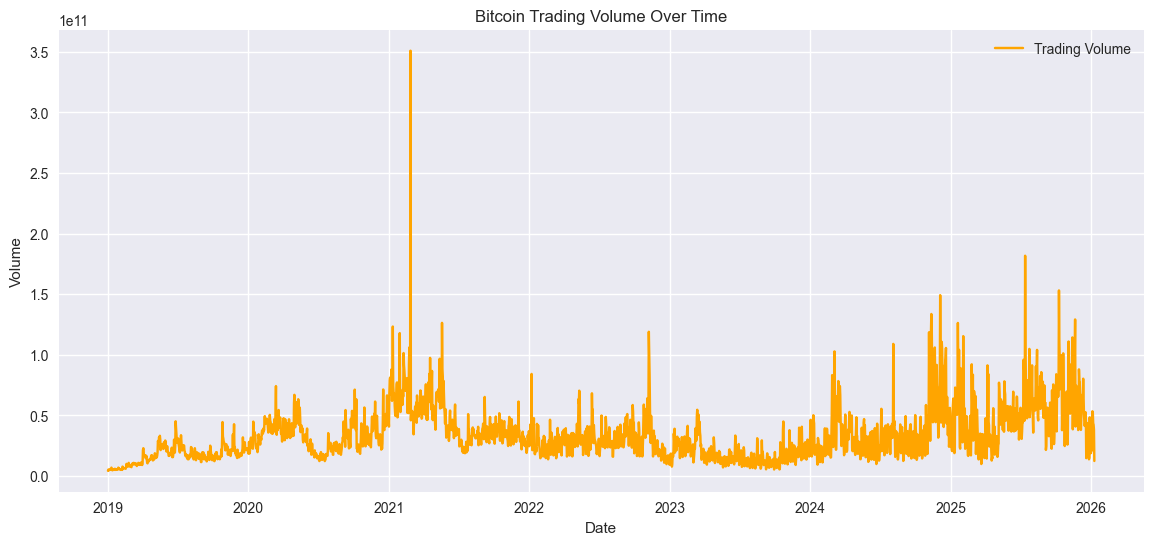

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Volume'], color='orange', label='Trading Volume')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


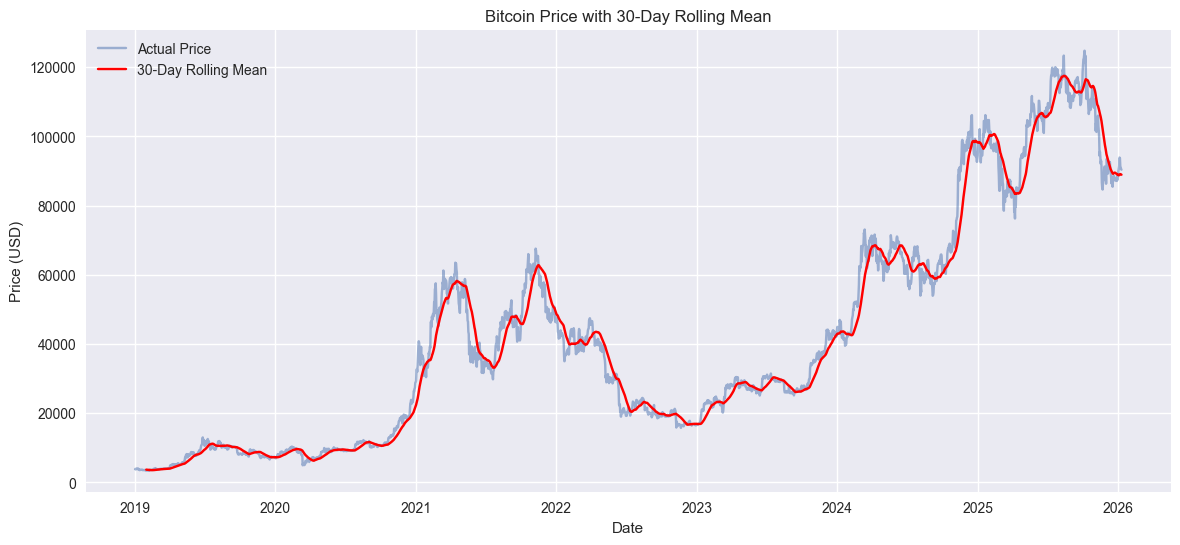

In [7]:
df['Rolling_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], alpha=0.5, label='Actual Price')
plt.plot(df.index, df['Rolling_30'], color='red', label='30-Day Rolling Mean')
plt.title('Bitcoin Price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [8]:
df['Daily_Return'] = df['Close'].pct_change()

df['Daily_Return'].describe()


count    2566.000000
mean        0.001763
std         0.032405
min        -0.371695
25%        -0.012696
50%         0.000728
75%         0.015244
max         0.187465
Name: Daily_Return, dtype: float64

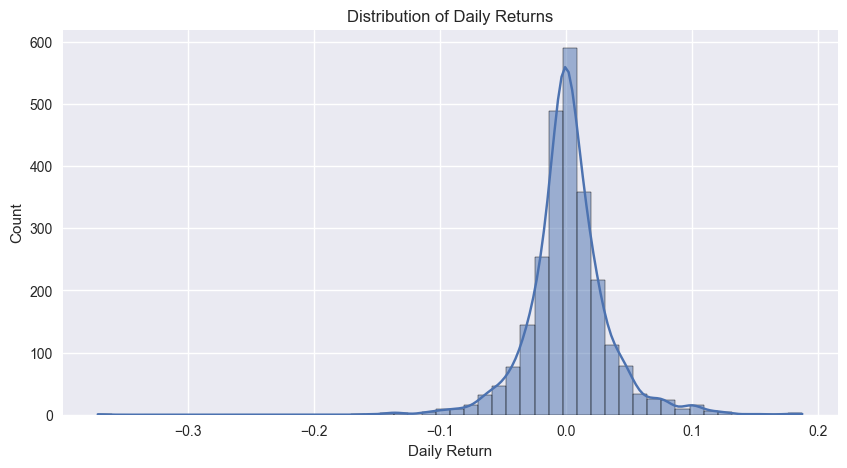

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()


In [10]:
df.to_csv("../data/processed/btc_usd_eda.csv")
print("EDA dataset saved successfully.")


EDA dataset saved successfully.
